<a href="https://colab.research.google.com/github/nivyathiruvoth/Global-Terrorism-Analysis/blob/main/EDA_Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

##Terrorism poses a direct threat to the security of the citizens all over the world. It also affects the stability, prosperity and economy of a country. Let us analyze global terrorism data across the years and find out some patterns.

#Let us start the analysis by loading libraries and reading input dataset

In [62]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
#reading the dataset
location = "/content/drive/MyDrive/Colab Notebooks/project/My project/Global Terrorism Data.csv"
gtd= pd.read_csv(location, encoding = 'ISO-8859-1',low_memory=False)

#Exploring the dataset by checking basic informations

In [65]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [66]:
gtd.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [67]:
#Obtaining the shape of the dataset
gtd.shape

(181691, 135)

The given data consists of 181691 rows and 135 columns

In [68]:
gtd.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

##What will be the key findings that can be obtained from the given dataset

1.   Number of casualties over the years.
2.   Detecting the country where the effects of terrorism exist the most.
3.   Civilians Deaths Across  Various Countries.
4.   Which terrorist group is carrying out the most number of attacks
5.   Deadliest terrorist groups.
6.   Examining the success rate of defence mechanisms of each country.
7.   Obtaining the most frequently used weapons.
8.   Total number of deaths due to each type of weapon.
9.   Which terrorist group possesses the most diverse weapons?
10.  Increment and decrement of terrorist attacks over the years.
11.  Number of terrorist groups in each region. 
12.  The most vlnerable region to terrorist attacks.
13.  Most affected target types.








#Identifying columns to keep

In [69]:
#Checking column names of our dataset
columns = list(gtd.columns)
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [70]:
#listing the required columns
columns_to_keep = ['eventid','iyear', 'imonth','country','country_txt',
 'region','region_txt','success',
 'attacktype1','attacktype1_txt','targtype1','targtype1_txt',
 'gname','weaptype1', 'weaptype1_txt','nkill','nwound']
print(columns_to_keep)

['eventid', 'iyear', 'imonth', 'country', 'country_txt', 'region', 'region_txt', 'success', 'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'gname', 'weaptype1', 'weaptype1_txt', 'nkill', 'nwound']


#Creating new data frame with selected columns

In [71]:
#Creating new data frame 
new_gtd= gtd[columns_to_keep]

In [72]:
new_gtd.columns

Index(['eventid', 'iyear', 'imonth', 'country', 'country_txt', 'region',
       'region_txt', 'success', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'gname', 'weaptype1', 'weaptype1_txt', 'nkill',
       'nwound'],
      dtype='object')

In [73]:
#Renaming columns
new_gtd=new_gtd.rename(columns = {'iyear': 'year', 'imonth': 'month', 'country':"country_id",'country_txt':'country_name','region':"region_id",'region_txt':"region_name",'attacktype1':'attacktype_id','attacktype1_txt':'attacktype','targtype1':'targtype_id', 'targtype1_txt':'targtype','weaptype1':"weapon_id",'weaptype1_txt':"weapon",'nkill':"deaths","nwound":'injured'})

#Examining new dataframe and getting basic informations

In [74]:
new_gtd.columns

Index(['eventid', 'year', 'month', 'country_id', 'country_name', 'region_id',
       'region_name', 'success', 'attacktype_id', 'attacktype', 'targtype_id',
       'targtype', 'gname', 'weapon_id', 'weapon', 'deaths', 'injured'],
      dtype='object')

In [75]:
new_gtd.shape

(181691, 17)

In [76]:
new_gtd.describe()

,eventid,year,month,country_id,region_id,success,attacktype_id,targtype_id,weapon_id,deaths,injured
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,131.968501,7.160938,0.889598,3.247547,8.439719,6.447325,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,112.414535,2.933408,0.313391,1.915772,6.653838,2.173435,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,78.000000,5.000000,1.000000,2.000000,3.000000,5.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,98.000000,6.000000,1.000000,3.000000,4.000000,6.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,160.000000,10.000000,1.000000,3.000000,14.000000,6.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,1004.000000,12.000000,1.000000,9.000000,22.000000,13.000000,1570.000000,8191.000000


In [77]:
new_gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventid        181691 non-null  int64  
 1   year           181691 non-null  int64  
 2   month          181691 non-null  int64  
 3   country_id     181691 non-null  int64  
 4   country_name   181691 non-null  object 
 5   region_id      181691 non-null  int64  
 6   region_name    181691 non-null  object 
 7   success        181691 non-null  int64  
 8   attacktype_id  181691 non-null  int64  
 9   attacktype     181691 non-null  object 
 10  targtype_id    181691 non-null  int64  
 11  targtype       181691 non-null  object 
 12  gname          181691 non-null  object 
 13  weapon_id      181691 non-null  int64  
 14  weapon         181691 non-null  object 
 15  deaths         171378 non-null  float64
 16  injured        165380 non-null  float64
dtypes: float64(2), int64(9), obje

In the new dataframe the columns  "civilians killed"  and "civilians wounded" contain null values. So we need to replace it with 0.

#Cleaning the dataset  

In [78]:
#Replacing nan value with 0.
new_gtd.fillna(value=0,inplace=True)

In [79]:
new_gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventid        181691 non-null  int64  
 1   year           181691 non-null  int64  
 2   month          181691 non-null  int64  
 3   country_id     181691 non-null  int64  
 4   country_name   181691 non-null  object 
 5   region_id      181691 non-null  int64  
 6   region_name    181691 non-null  object 
 7   success        181691 non-null  int64  
 8   attacktype_id  181691 non-null  int64  
 9   attacktype     181691 non-null  object 
 10  targtype_id    181691 non-null  int64  
 11  targtype       181691 non-null  object 
 12  gname          181691 non-null  object 
 13  weapon_id      181691 non-null  int64  
 14  weapon         181691 non-null  object 
 15  deaths         181691 non-null  float64
 16  injured        181691 non-null  float64
dtypes: float64(2), int64(9), obje

#1. **Number of casualities over the years**





In [80]:
new_gtd.columns

Index(['eventid', 'year', 'month', 'country_id', 'country_name', 'region_id',
       'region_name', 'success', 'attacktype_id', 'attacktype', 'targtype_id',
       'targtype', 'gname', 'weapon_id', 'weapon', 'deaths', 'injured'],
      dtype='object')

In [81]:
 #Using group by to track number of attacks, number of deaths and number of injured over the years
 df1 = new_gtd.groupby('year').agg({"eventid":"count",'deaths':'sum',"injured":"sum"})

In [82]:
df1.reset_index(inplace=True)

In [83]:
#renaming the columns
df1.rename(columns={"eventid":"num_of_attacks"},inplace=True)
df1.head()

,year,num_of_attacks,deaths,injured
0,1970,651,174.0,212.0
1,1971,471,173.0,82.0
2,1972,568,566.0,409.0
3,1973,473,370.0,495.0
4,1974,581,539.0,865.0


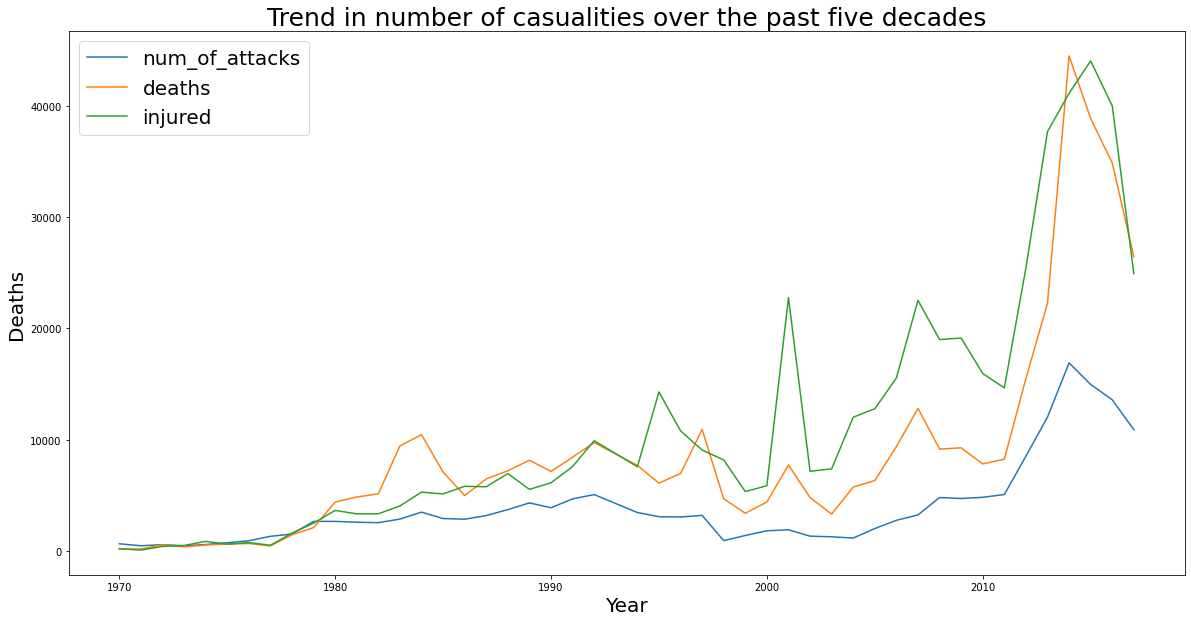

In [84]:
#Plotting graph
plt.rcParams["figure.figsize"]=(20,10)
df1.plot(x="year",y=["num_of_attacks",'deaths','injured'],kind="line",stacked=False).legend(fontsize=20)
plt.title("Trend in number of casualities over the past five decades",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Deaths",fontsize=20)

plt.show()

##**Inferences:**

###The number of attacks and the number of people killed and injured in terrorist attacks have been steadily rising over the years. There has been a slight decline over the last few years.

#2.**Detecting the country where the effects of terrorism exist the most** 

In [85]:
#calculating number of attacks in each country
country = new_gtd.groupby('country_name')['country_id'].count().reset_index().rename(columns = {'country_id':'number of attacks'})
country.sort_values(by="number of attacks",ascending=False,inplace=True)

In [86]:
country.head()

,country_name,number of attacks
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731
80,India,11960
35,Colombia,8306


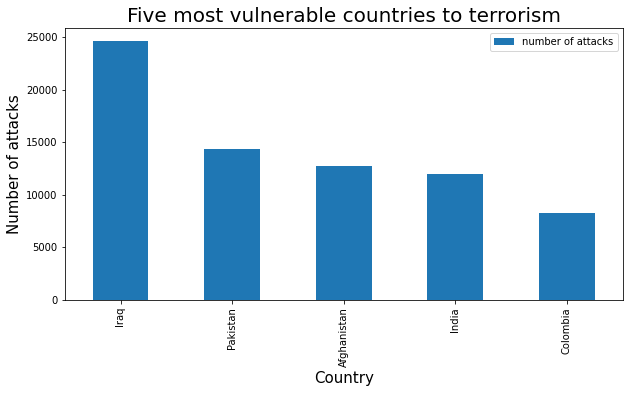

In [87]:
#ploting the graph using matplotlib
plt.rcParams["figure.figsize"]=(10,5)
country.head().plot(x="country_name",y="number of attacks",kind="bar")
plt.title("Five most vulnerable countries to terrorism",fontsize=20)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

##**Inferences**

###Among countries Iraq is the most vulnerable to terrorist attacks.